<a href="https://colab.research.google.com/github/PBLEAVITT/MAT-421/blob/main/MAT421HW21_4_21_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 421 HW 21.4, and 21.5 - Parker Leavitt

## Simpson's Rule - 21.4

**Simpson's Rule** approximates a function f(x) by computing the area of two subintervals by fitting a quadratic polynomial through the points (xi−1,f(xi−1)),(xi,f(xi))
, and (xi+1,f(xi+1))
, which is a unique polynomial, and then integrating the quadratic exactly.

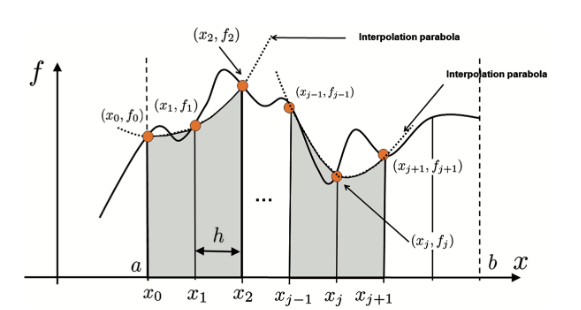

**Example:** Approximate the following function with 16 evenly spaced grid points over the whole interval. Compare this value to the exact value of 4.

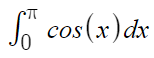

In [1]:
import numpy as np

a = 0
b = np.pi
n = 16
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 4 - I_simp

print(I_simp)
print(err_simp)

0.3460146798656223
3.6539853201343777


## Computing Integrals in Python - 21.5

The ***scipy.integrate***
 sub-package has several functions for computing integrals. The ***trapz***
 takes as input arguments an array of function values f
 computed on a numerical grid x
.

**Example:** Approximate the following function with 16 evenly spaced grid points over the whole interval. Compare it to the value from using the Trapezoid Rule.

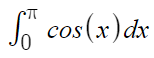

In [2]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 16
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.1102230246251565e-16
2.092721098805179e-16


**Example:** Use the ***cumtrapz***
 function to approximate the cumulative integral of f(x)=sin(x)
 from 0
 to π
 with a discretization step of 0.01. The exact solution of this integral is F(x)=sin(x)
. Plot the results.

<ipython-input-6-be5334776da1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


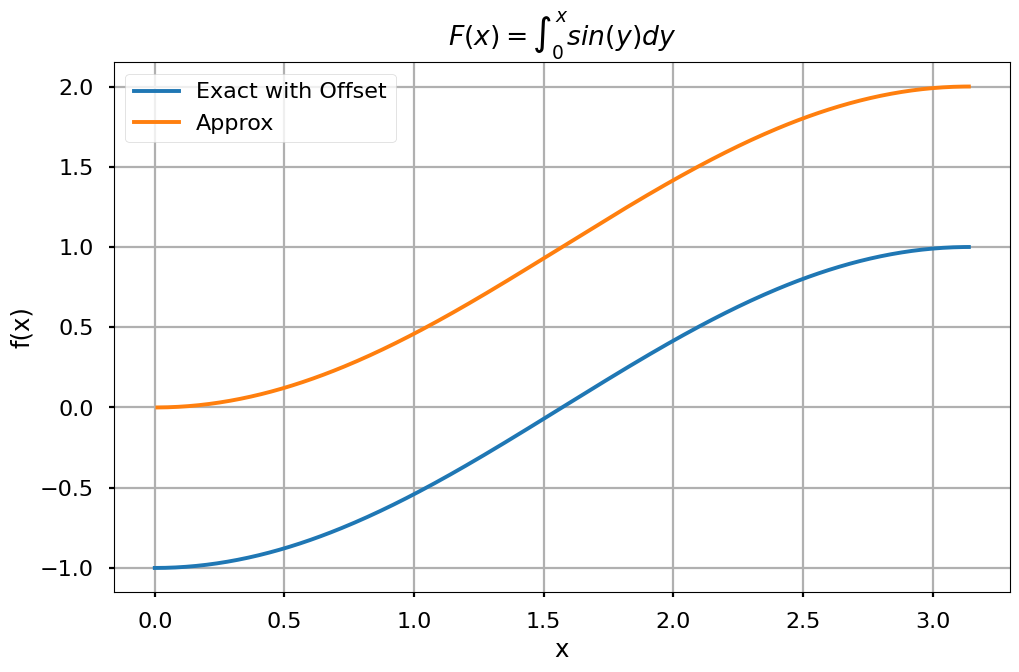

In [6]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

The ***quad(f,a,b)***
 function uses a different numerical differentiation scheme to approximate integrals. quad
 integrates the function defined by the function object, f
, from a
 to b
.

**Example:** Use the integrate.quad to intergrate the functions below. Compare that answer to the correct answer of 2.

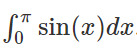

In [7]:
from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
